# Optimisation numérique avec `scipy`

*Prérequis : connaître numpy et les concepts généraux de l'optimisation numérique.*

Pour l'optimisation, on peut utiliser les fonctions du module `SciPy`.

In [3]:
import numpy as np
from scipy.optimize import linprog

## 1. Premier exemple en programmation linéaire

On va résoudre le problème de programmation linéaire:
```
Minimiser :          c^T * x
Sous contraintes :   A_ub * x <= b_ub
                     A_eq * x == b_eq
```

N'oubliez pas qu'on peut toujours demander de l'aide !

In [4]:
help(linprog)

Help on function linprog in module scipy.optimize._linprog:

linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form::
    
        Minimize:     c^T * x
    
        Subject to:   A_ub * x <= b_ub
                      A_eq * x == b_eq
    
    Parameters
    ----------
    c : array_like
        Coefficients of the linear objective function to be minimized.
    A_ub : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, gives the values of
        the upper-bound inequality constraints at ``x``.
    b_ub : array_like, optional
        1-D array of values representing the upper-bound of each inequality
        constraint (row) in ``A_ub``.
    A_eq : array_like, optional
        2-D array which, when matrix-multiplied by ``x``, 

Commençons par un problème basique.

In [5]:
c = [40, 10, 30]
A_eq = [[1, 1, 1]]
b_eq = [30]
A_ub = [[0, 1, -1]]
b_ub = [0]
bounds = [
    (0, 20),
    (0, 20),
    (0, 20)
]

In [6]:
res = linprog(c, A_ub, b_ub, A_eq, b_eq, bounds,
              options={"disp": True})

Optimization terminated successfully.
         Current function value: 600.000000  
         Iterations: 4


In [7]:
print(res)

     fun: 600.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([ 0., 20.,  5.,  5.])
  status: 0
 success: True
       x: array([ 0., 15., 15.])


## Correction de l'exercice sur les centrales

In [59]:
linprog(
    c=[5, 10],
    A_eq=[[1, 1]],
    b_eq=[50],
    bounds=[[0, 30], [0, 40]]
)

     fun: 350.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 20.])
  status: 0
 success: True
       x: array([30., 20.])

## 2. Un exemple un peu plus complexe

On a à notre disposition 5 centrales électriques pour produire une puissance de 350 MW pendant une heure.

* Les coûts des centrales sont de 20 €/MWh, 40 €/MWh, 24 €/MWh, 12 €/MWh et 32 €/MWh.
* Les puissances maximales de chaque centrale sont de 100 MW.

In [48]:
c = [20, 40, 24, 12, 32]
A = [[1, 1, 1, 1, 1]]
b = [350]

In [49]:
bounds = (0, 100)

In [50]:
res = linprog(c, A_eq=A, b_eq=b,
              bounds=(bounds, bounds, bounds, bounds, bounds),
              options={"disp": True})

Optimization terminated successfully.
         Current function value: 7200.000000 
         Iterations: 6


In [51]:
print(res)

     fun: 7200.0
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([   0.,  100.,    0.,    0.,   50.])
  status: 0
 success: True
       x: array([ 100.,    0.,  100.,  100.,   50.])


La solution semble effectivement la plus raisonnable (**toujours vérifier la solution !!**) : on commence par prouire avec la centrale la moins chère, puis on augmente.

## 3. Augmentons un peu la taille du problème

On va monitorer le temps passé.

Pour cela, on utilise la fonction `time.time()` qui nous rend l'heure en secondes.

In [20]:
import time

In [21]:
def my_opt(n=5):
    tt = time.time()
    
    c = np.random.uniform(low=30, high=50, size=n)
    A = np.ones(shape=(1, n))
    b = np.random.uniform(low=0.7, high=1.0, size=1) * n * 100
    
    bounds = (0, 100)
    
    res = linprog(c, A_eq=A, b_eq=b, bounds=bounds)
    
    return time.time() - tt

In [29]:
for nb in [50, 500]:
    temps_moyen = 0
    for i in range(10):
        temps_moyen += my_opt(nb)
    temps_moyen /= 10
    print(f"Pour n={nb}, ça prend {temps_moyen:.2f} secondes")

Pour n=50, ça prend 0.04 secondes
Pour n=500, ça prend 1.69 secondes


Profitons-en pour faire quelques affichages avec `matplotlib`.

In [30]:
import matplotlib.pyplot as plt

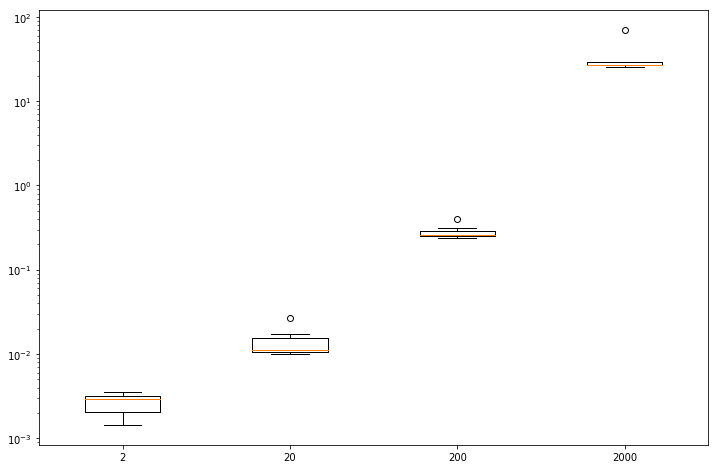

In [42]:
nb_expes = 10
nb_centrales = [2, 20, 200, 2000]

tous_les_temps = []
for nb in nb_centrales:
    temps = []
    for i in range(nb_expes):
        temps.append(my_opt(nb))
    tous_les_temps.append(temps)

# Affichage
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.boxplot(tous_les_temps, labels=nb_centrales)
ax.set(yscale='log')

plt.show()